In [12]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

project_root = Path("/dmj/fizmed/mmarzec/licencjat_neuro/magisterka")
sys.path.insert(0, str(project_root / "src"))

In [13]:
from preprocessing.frame_exporter import EEGFrameExporter #type:ignore
from connectivity.mtmvar import remove_channels, DTF_multivariate, mvar_plot, multivariate_spectra #type:ignore
from preprocessing.constants import DEFAULT_HP_CUTOFF, DEFAULT_LP_CUTOFF, DEFAULT_SFREQ #type:ignore

In [14]:
counter = 2

In [15]:
groups = EEGFrameExporter.load_all_groups(f"results/demoDTF/{counter}/frames")
info = EEGFrameExporter.load_group_info(f"results/demoDTF/{counter}/frames")

print(f"Wczytano {len(groups)} grup:")
for name in groups.keys():
    print(f"  • {name}: {groups[name].shape[0]} ramek")

Wczytano 6 grup:
  • eyes_closed: 6 ramek
  • eyes_opened: 6 ramek
  • stimulation_hyperventilationstart: 20 ramek
  • stimulation_hyperventilationstop: 1 ramek
  • stimulation_photostimulationstart: 1 ramek
  • stimulation_photostimulationstop: 1 ramek


Z sygnału przy jakimkolwiek montazu trzeba wyrzucić jeden kanał
- gdy do Cz/ Fz -> ten dany danał
- gdy do average -> wywalić Fz, co wynika z analiz SHAPowych Kacpra


In [19]:
MAX_P = 30
P_OPT = 7 # Automatyczny wybór
CRIT_TYPE = 'AIC'
FMIN = DEFAULT_HP_CUTOFF
FMAX = DEFAULT_LP_CUTOFF

# Wektor częstotliwości
f = np.arange(1,30, 0.1)

print(f"\nParametry DTF:")
print(f"  Frequency: {DEFAULT_HP_CUTOFF}-{DEFAULT_LP_CUTOFF} Hz")
print(f"  Max model order: {MAX_P}")
print(f"  Criterion: {CRIT_TYPE}")


Parametry DTF:
  Frequency: 1.0-40.0 Hz
  Max model order: 30
  Criterion: AIC


EYES OPENED - DTF dla każdej ramki


Grupa: eyes_opened
  Liczba ramek: 6
  Sampling rate: 128 Hz

Ramka 1/6
  New shape: (18, 768)


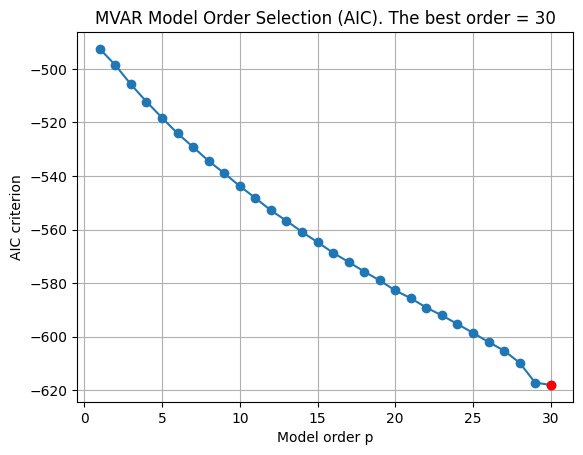

Optimal model order for all channels: p =  30
Optimal model order for all channels: p =  30
  ✓ Zapisano: dtf_eo_frame_001.png

Ramka 2/6
  New shape: (18, 768)


/dmj/fizmed/mmarzec/licencjat_neuro/magisterka/src/connectivity/mtmvar.py:750: RuntimeWarning: invalid value encountered in log
  crit[p-1] = np.log(np.linalg.det(Vr)) + 2 * p * k**2 / N


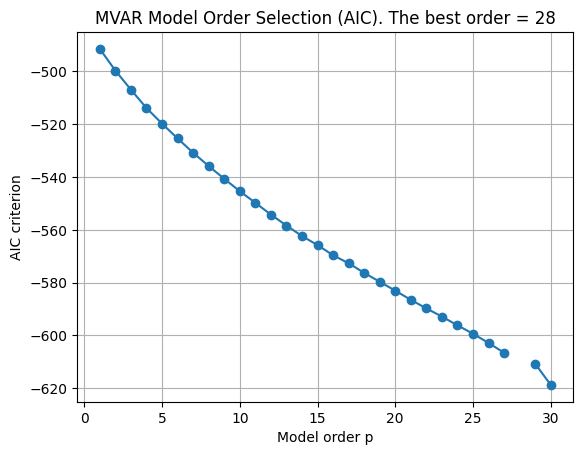

Optimal model order for all channels: p =  28
Optimal model order for all channels: p =  28
  ✓ Zapisano: dtf_eo_frame_002.png

Ramka 3/6
  New shape: (18, 768)


/dmj/fizmed/mmarzec/licencjat_neuro/magisterka/src/connectivity/mtmvar.py:750: RuntimeWarning: invalid value encountered in log
  crit[p-1] = np.log(np.linalg.det(Vr)) + 2 * p * k**2 / N


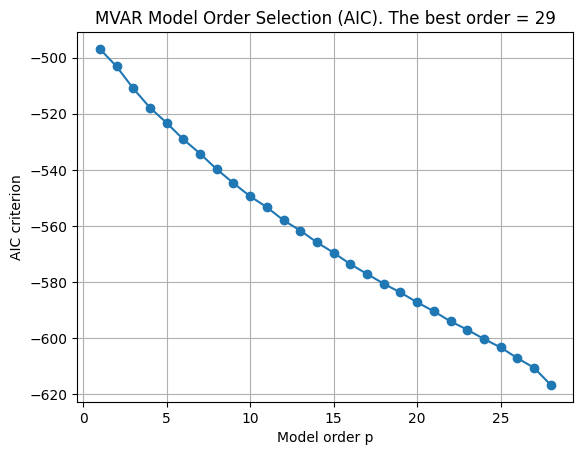

Optimal model order for all channels: p =  29
Optimal model order for all channels: p =  29
  ✓ Zapisano: dtf_eo_frame_003.png

Ramka 4/6
  New shape: (18, 768)


/dmj/fizmed/mmarzec/licencjat_neuro/magisterka/src/connectivity/mtmvar.py:750: RuntimeWarning: invalid value encountered in log
  crit[p-1] = np.log(np.linalg.det(Vr)) + 2 * p * k**2 / N


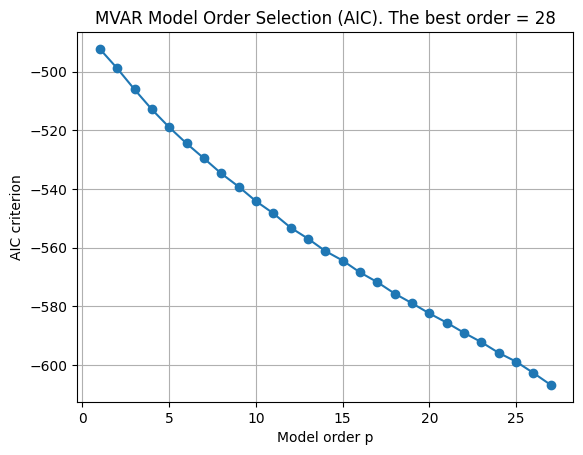

Optimal model order for all channels: p =  28
Optimal model order for all channels: p =  28
  ✓ Zapisano: dtf_eo_frame_004.png

Ramka 5/6
  New shape: (18, 768)


/dmj/fizmed/mmarzec/licencjat_neuro/magisterka/src/connectivity/mtmvar.py:750: RuntimeWarning: invalid value encountered in log
  crit[p-1] = np.log(np.linalg.det(Vr)) + 2 * p * k**2 / N


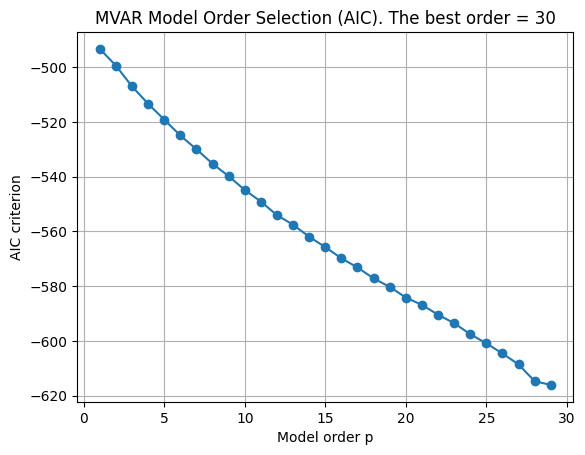

Optimal model order for all channels: p =  30
Optimal model order for all channels: p =  30
  ✓ Zapisano: dtf_eo_frame_005.png

Ramka 6/6
  New shape: (18, 768)


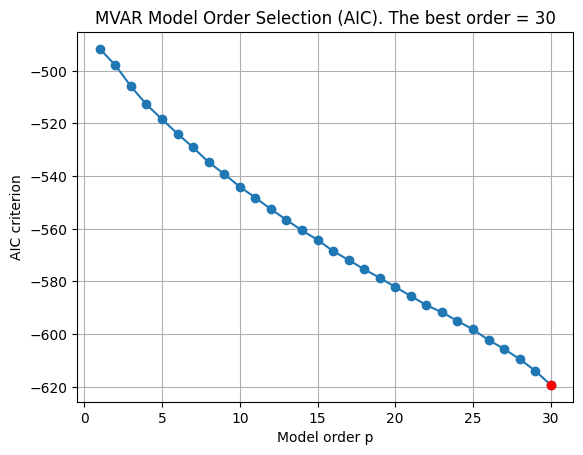

Optimal model order for all channels: p =  30
Optimal model order for all channels: p =  30
  ✓ Zapisano: dtf_eo_frame_006.png

✓ Wszystkie wykresy Eyes Opened zapisane w: results/demoDTF/without_ref/dtf_eyes_opened


In [18]:
group_name = 'eyes_opened'
frames_eo = groups[group_name]
channels_eo_ref = info[group_name]['channel_names']

print(f"\nGrupa: {group_name}")
print(f"  Liczba ramek: {len(frames_eo)}")
print(f"  Sampling rate: {DEFAULT_SFREQ} Hz")

# Katalog do zapisywania wykresów
output_dir_eo = Path(f"results/demoDTF/{counter}/dtf_eyes_opened")
output_dir_eo.mkdir(exist_ok=True, parents=True)

# Oblicz DTF dla każdej ramki
for i, frame in enumerate(frames_eo):
    print(f"\nRamka {i+1}/{len(frames_eo)}")
    frame, channels_eo = remove_channels(frame, channels_eo_ref, channels_to_remove=["Cz"])
    print(f"  New shape: {frame.shape}")
    
    #Oblicz widmo
    S_multivariate = multivariate_spectra(
        signals = frame, 
        f = f, 
        Fs = DEFAULT_SFREQ,
        max_p = MAX_P, 
        p_opt = P_OPT,
        crit_type = CRIT_TYPE
    )

    # Oblicz DTF
    DTF = DTF_multivariate(
        signals = frame, 
        f = f, 
        Fs = DEFAULT_SFREQ,
        max_p = MAX_P, 
        p_opt = P_OPT,
        crit_type = CRIT_TYPE
    )

    
    # Wizualizacja
    fig = mvar_plot(S_multivariate, DTF, f, '', '', channels_eo, 'DTF - Eyes Opened', 'sqrt')
    
    # Zapisz wykres
    output_file = output_dir_eo / f"dtf_eo_frame_{i+1:03d}.png"
    plt.savefig(output_file, dpi=150, bbox_inches='tight')
    print(f"  ✓ Zapisano: {output_file.name}")
    
    plt.close()  # Zamknij figure aby zwolnić pamięć

print(f"\n✓ Wszystkie wykresy Eyes Opened zapisane w: {output_dir_eo}")

In [21]:
group_name = 'eyes_closed'
frames_ec = groups[group_name]
channels_ec_ref = info[group_name]['channel_names']

print(f"\nGrupa: {group_name}")
print(f"  Liczba ramek: {len(frames_ec)}")
print(f"  Sampling rate: {DEFAULT_SFREQ} Hz")

# Katalog do zapisywania wykresów
output_dir_ec = Path(f"results/demoDTF/{counter}_P_OPT_7/dtf_eyes_closed")
output_dir_ec.mkdir(exist_ok=True, parents=True)

# Oblicz DTF dla każdej ramki
for i, frame in enumerate(frames_ec):
    print(f"\nRamka {i+1}/{len(frames_ec)}")
    frame, channels_ec = remove_channels(frame, channels_ec_ref, channels_to_remove=["Cz"])
    print(f"  Shape: {frame.shape}")
    
    #Oblicz widmo
    S_multivariate = multivariate_spectra(
        signals = frame, 
        f = f, 
        Fs = DEFAULT_SFREQ,
        max_p = MAX_P, 
        p_opt = P_OPT,
        crit_type = CRIT_TYPE
    )

    # Oblicz DTF
    DTF = DTF_multivariate(
        signals = frame, 
        f = f, 
        Fs = DEFAULT_SFREQ,
        max_p = MAX_P, 
        p_opt = P_OPT,
        crit_type = CRIT_TYPE
    )

    
    # Wizualizacja
    fig = mvar_plot(S_multivariate, DTF, f, '', '', channels_ec, 'DTF - Eyes Closed', 'sqrt')
    
    # Zapisz wykres
    output_file = output_dir_ec / f"dtf_ec_frame_{i+1:03d}.png"
    plt.savefig(output_file, dpi=150, bbox_inches='tight')
    print(f"  ✓ Zapisano: {output_file.name}")
    
    plt.close()  # Zamknij figure aby zwolnić pamięć

print(f"\n✓ Wszystkie wykresy Eyes Closed zapisane w: {output_dir_ec}")


Grupa: eyes_closed
  Liczba ramek: 6
  Sampling rate: 128 Hz

Ramka 1/6
  Shape: (18, 768)
Using provided model order: p =  7
Using provided model order: p =  7
  ✓ Zapisano: dtf_ec_frame_001.png

Ramka 2/6
  Shape: (18, 768)
Using provided model order: p =  7
Using provided model order: p =  7
  ✓ Zapisano: dtf_ec_frame_002.png

Ramka 3/6
  Shape: (18, 768)
Using provided model order: p =  7
Using provided model order: p =  7
  ✓ Zapisano: dtf_ec_frame_003.png

Ramka 4/6
  Shape: (18, 768)
Using provided model order: p =  7
Using provided model order: p =  7
  ✓ Zapisano: dtf_ec_frame_004.png

Ramka 5/6
  Shape: (18, 768)
Using provided model order: p =  7
Using provided model order: p =  7
  ✓ Zapisano: dtf_ec_frame_005.png

Ramka 6/6
  Shape: (18, 768)
Using provided model order: p =  7
Using provided model order: p =  7
  ✓ Zapisano: dtf_ec_frame_006.png

✓ Wszystkie wykresy Eyes Closed zapisane w: results/demoDTF/2_P_OPT_7/dtf_eyes_closed
